## GRIP Task 2 - K means Clustering

In [2]:
###From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.


In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import datasets


In [4]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

In [6]:
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

([<matplotlib.axis.XTick at 0x222b0c81370>,
 <a list of 10 Text major ticklabel objects>)

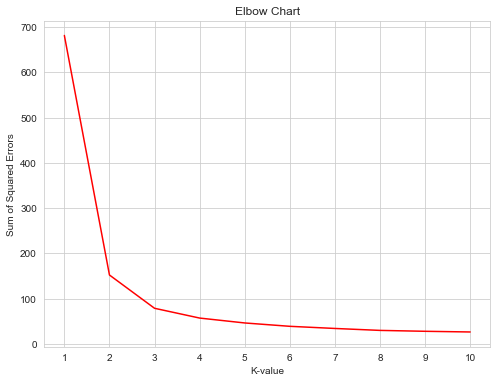

In [7]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
plt.plot(range(1,11), sse, color='red')
plt.xlabel('K-value')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Chart')
plt.xticks(ticks=range(1,11))

#### As we can see from the graph that the value of the elbow is k=3. So k is the optimum value.

In [8]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(x)

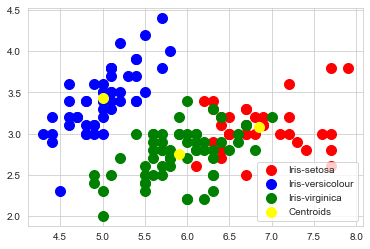

In [9]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()